In [1]:
from itertools import combinations
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_excel('SubjectDetails.xls')

In [3]:
# Define vars of interest
vars_of_interest = ['C3A2', 'abdo', 'Flow', 'Sum', 'Pulse', 'RightEye', 'C4A1', 'SpO2', 'BodyPos', 'ribcage', 'EMG', 'ECG', 'Lefteye']
var_pairs = list(combinations(vars_of_interest, 2))
res = pd.DataFrame(columns=[f's.DTW:{i} - {j}' for i, j in var_pairs])

In [4]:
# Iterate over DTW data files
files = sorted(os.listdir('DTW_standardized'))
dtws = []
for i, f in enumerate(files):
    dtw_data = pd.read_csv(f'DTW_standardized/{f}', index_col=0)
    dtws.append(dtw_data)
    res.loc[i] = [dtw_data.loc[var_1, var_2] for var_1, var_2 in var_pairs]

In [5]:
# Divide by study duration to take into account that studies taking longer might have higher DTW distances between pairs
res2 = res.div(df['Study Duration (hr)'], axis=0)

In [6]:
res.mean().sort_values()[:20]

s.DTW:Sum - ribcage         303.062618
s.DTW:abdo - Sum            323.554664
s.DTW:RightEye - Lefteye    471.180813
s.DTW:abdo - ribcage        496.172264
s.DTW:RightEye - C4A1       497.371327
s.DTW:C4A1 - Lefteye        516.578839
s.DTW:Flow - Sum            561.939569
s.DTW:C3A2 - Lefteye        568.211073
s.DTW:C3A2 - C4A1           571.462060
s.DTW:abdo - Flow           575.473306
s.DTW:C3A2 - RightEye       576.567708
s.DTW:ribcage - Lefteye     577.966743
s.DTW:RightEye - ribcage    579.717773
s.DTW:Sum - RightEye        580.076671
s.DTW:Sum - Lefteye         584.659605
s.DTW:Flow - ribcage        585.869655
s.DTW:abdo - Lefteye        589.045413
s.DTW:abdo - RightEye       590.755954
s.DTW:C4A1 - ribcage        601.595109
s.DTW:Sum - C4A1            605.756403
dtype: float64

In [7]:
res2.mean().sort_values()[:20]

s.DTW:Sum - ribcage         43.625992
s.DTW:abdo - Sum            46.803256
s.DTW:RightEye - Lefteye    68.558182
s.DTW:abdo - ribcage        71.790204
s.DTW:RightEye - C4A1       72.140607
s.DTW:C4A1 - Lefteye        75.043132
s.DTW:Flow - Sum            81.324960
s.DTW:C3A2 - Lefteye        82.544875
s.DTW:C3A2 - C4A1           82.950758
s.DTW:abdo - Flow           83.347466
s.DTW:ribcage - Lefteye     83.721000
s.DTW:C3A2 - RightEye       83.785329
s.DTW:RightEye - ribcage    83.900131
s.DTW:Sum - RightEye        83.966514
s.DTW:Sum - Lefteye         84.687022
s.DTW:Flow - ribcage        84.865517
s.DTW:abdo - Lefteye        85.471624
s.DTW:abdo - RightEye       85.666236
s.DTW:C4A1 - ribcage        87.091538
s.DTW:Sum - C4A1            87.697715
dtype: float64

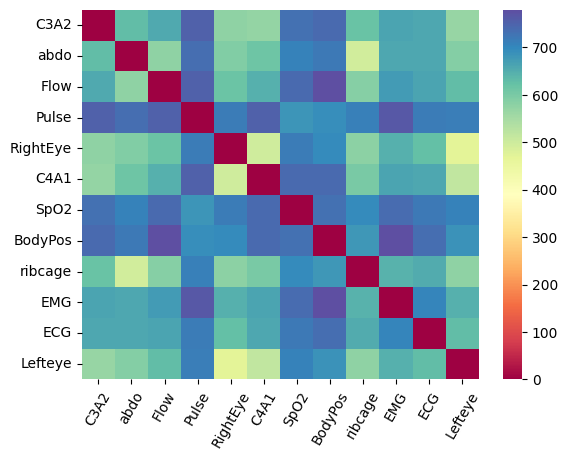

In [8]:
df_means = pd.DataFrame(np.stack([df.to_numpy() for df in dtws], axis=2).mean(axis=2), columns = vars_of_interest, index=vars_of_interest)
df_means = df_means.drop(index='Sum', columns='Sum')
ax = sns.heatmap(df_means, cmap='Spectral')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)